In [165]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [166]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [167]:
df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending_Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending_Score')

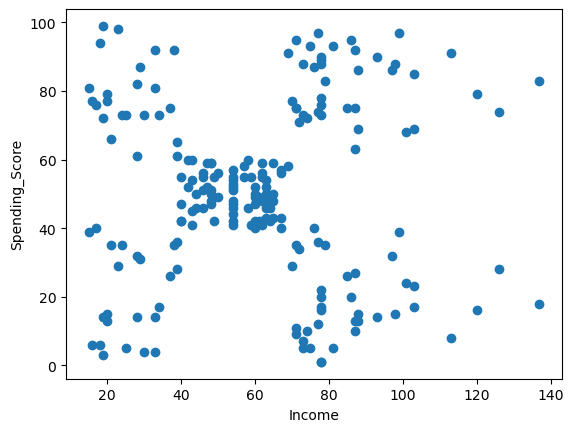

In [168]:
plt.scatter(df.Income,df.Spending_Score)
plt.xlabel('Income')
plt.ylabel('Spending_Score')

In [169]:
df_sh=df[['Income','Spending_Score']]

In [170]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_sh)
    sse.append(km.inertia_)

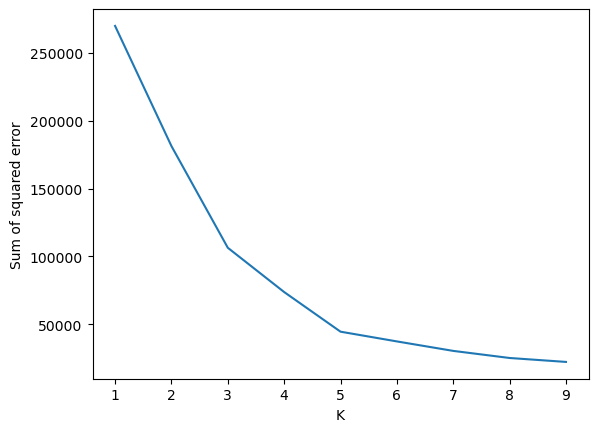

In [171]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [172]:
km=KMeans(n_clusters=5)
y_predict=km.fit_predict(df_sh)
y_predict

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [173]:
df_sh['cluster']=y_predict
df_sh.head()

,Income,Spending_Score,cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


In [174]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

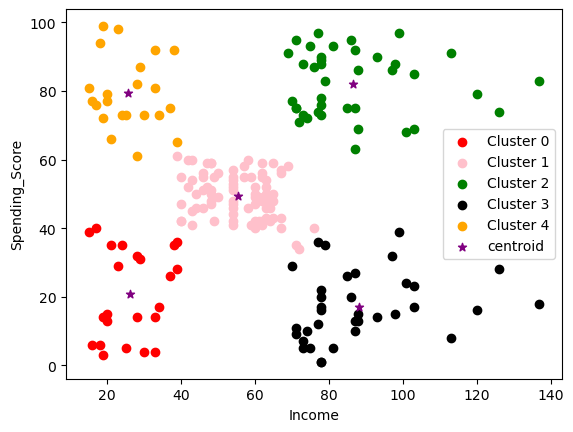

In [179]:
df_sh1 = df_sh[df_sh.cluster == 0]
df_sh2 = df_sh[df_sh.cluster == 1]
df_sh3 = df_sh[df_sh.cluster == 2]
df_sh4 = df_sh[df_sh.cluster == 3]
df_sh5 = df_sh[df_sh.cluster == 4]

plt.scatter(df_sh1.Income, df_sh1.Spending_Score, color='red', label='Cluster 0')
plt.scatter(df_sh2.Income, df_sh2.Spending_Score, color='pink', label='Cluster 1')
plt.scatter(df_sh3.Income, df_sh3.Spending_Score, color='green', label='Cluster 2')
plt.scatter(df_sh4.Income, df_sh4.Spending_Score, color='black', label='Cluster 3')
plt.scatter(df_sh5.Income, df_sh5.Spending_Score, color='orange', label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Income')
plt.ylabel('Spending_Score')
plt.legend()